# Noise

## Using numpy

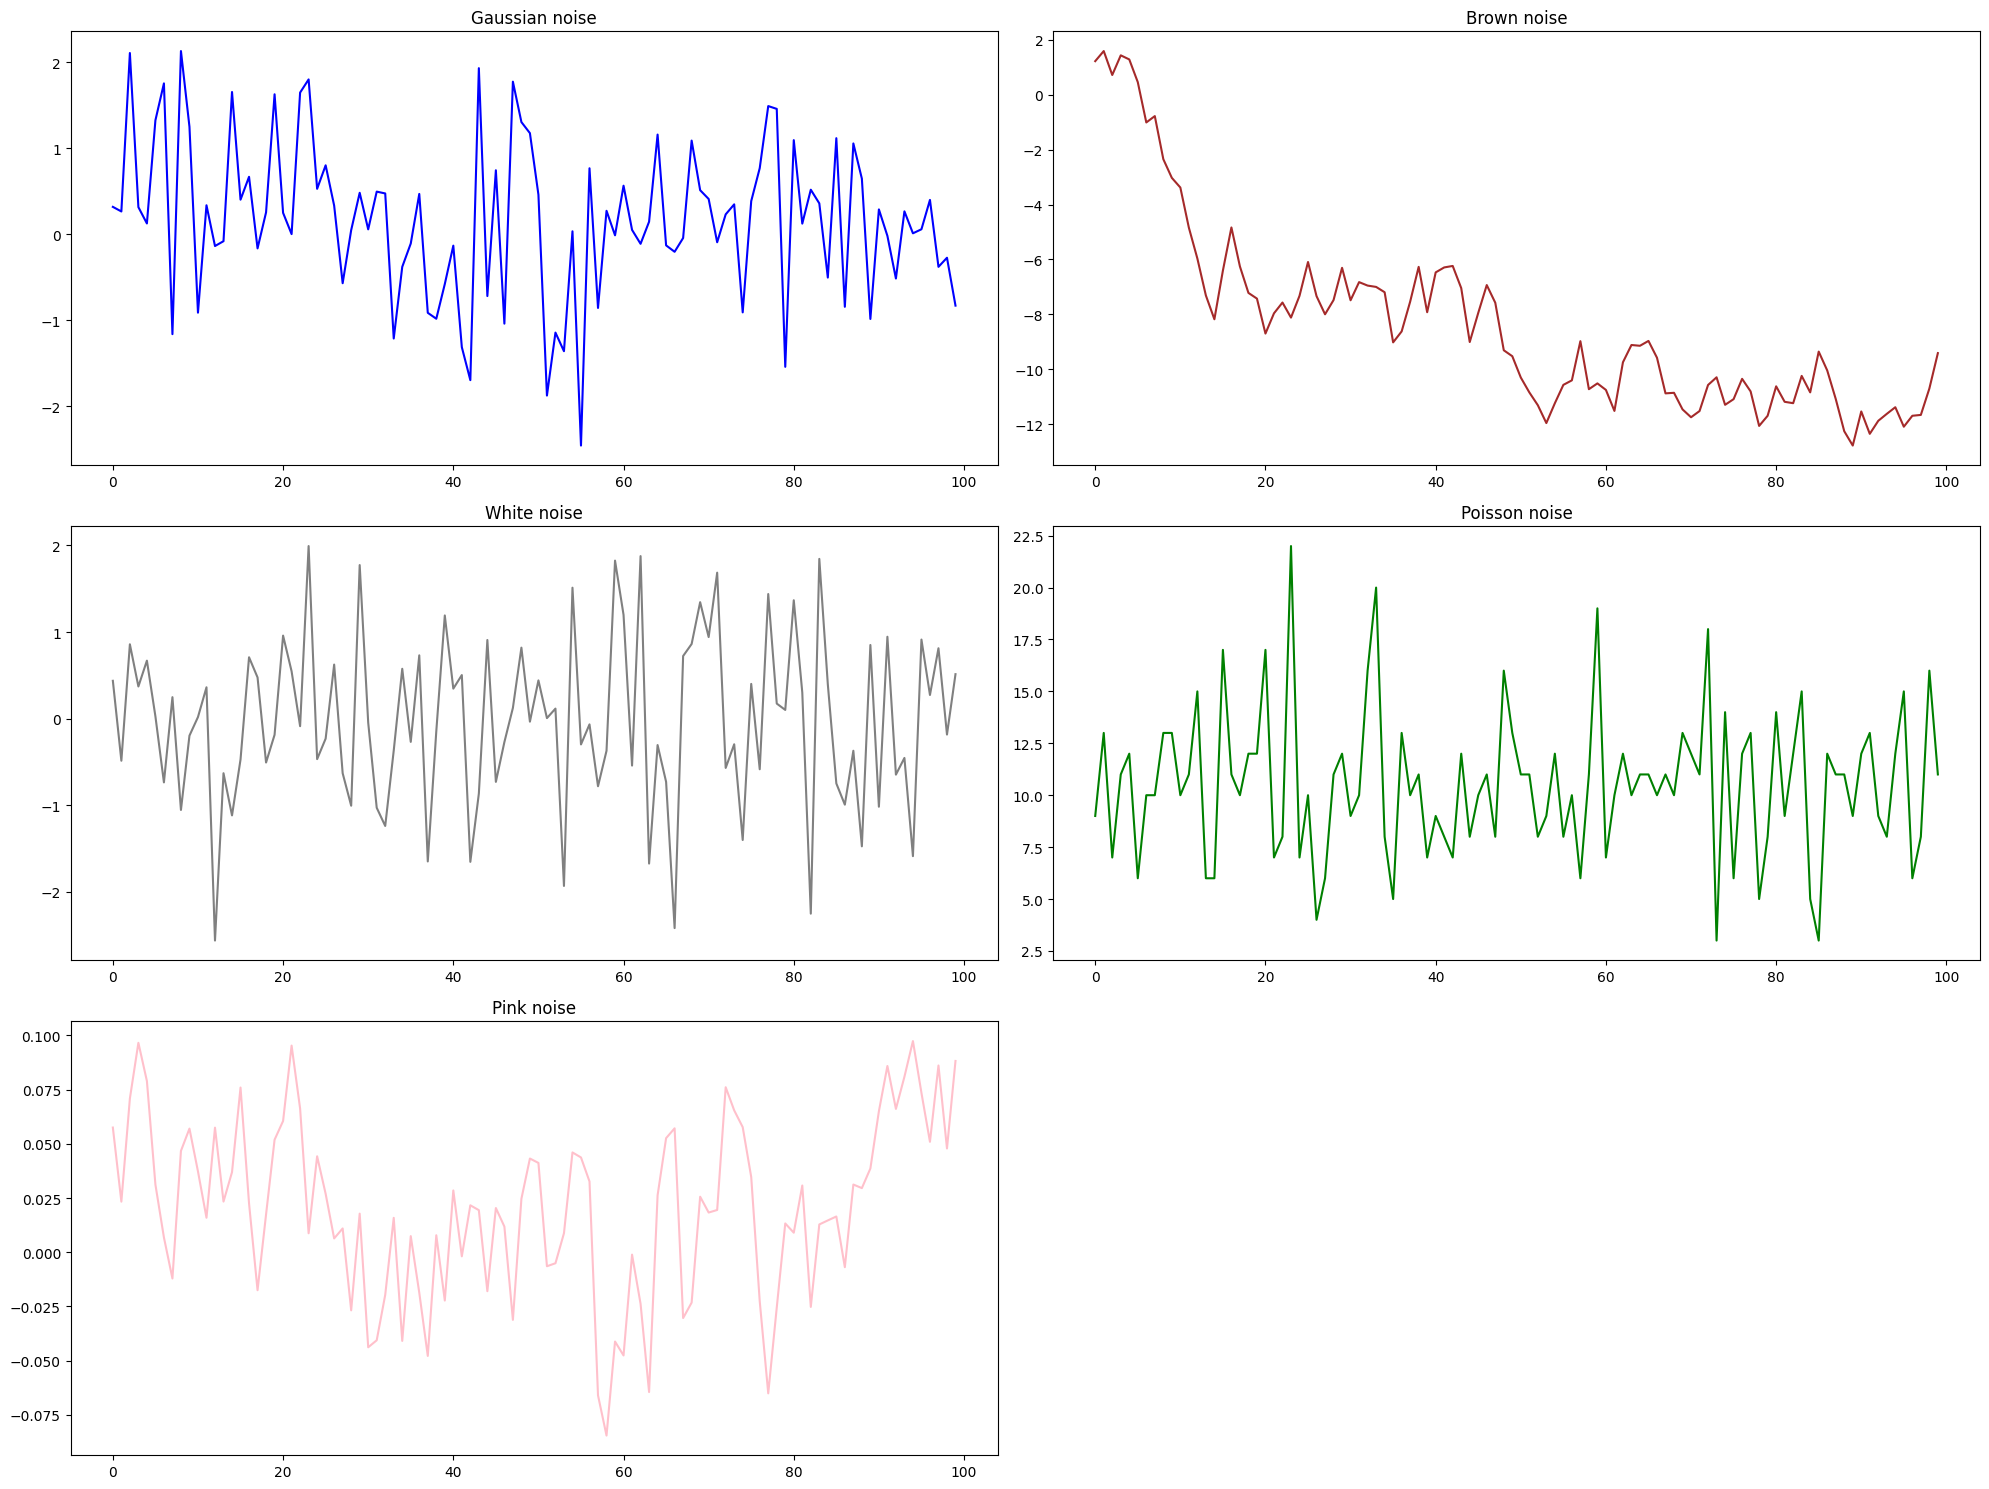

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generate_noise(type, mean=0, stddev=1, size=100):
    rng = np.random.default_rng()

    if type == "gaussian":
        noise = rng.normal(mean, stddev, size=size)
    elif type == "brown":
        noise = np.cumsum(rng.normal(0, 1, size=size))
    elif type == "white":
        noise = rng.standard_normal(size=size)
    elif type == "poisson":
        noise = rng.poisson(mean, size=size)
    elif type == "pink":
        # Generate white noise first
        white = np.random.randn(size)

        # Compute FFT
        r = np.fft.rfft(white)

        # Prepare an array with 1/f, we'll also avoid division by 0
        index = np.arange(1, size//2 + 2, dtype=np.float64)**0.5

        # Pink Noise: scaled by the square root of the frequencies (1/f)
        r = r / index

        # Inverse FFT and normalization
        noise = np.fft.irfft(r) / np.sqrt(size / 2)
    else:
        raise ValueError("Invalid noise type")

    return noise

# Generate Gaussian noise
gaussian_noise = generate_noise("gaussian")

# Generate Brown noise
brown_noise = generate_noise("brown")

# Generate White noise
white_noise = generate_noise("white")

# Generate Poisson noise
poisson_noise = generate_noise("poisson", mean=10)  # Poisson noise requires a non-zero mean

# Generate Pink noise
pink_noise = generate_noise("pink")

# Plot the noise arrays
plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
plt.plot(gaussian_noise, color='blue')
plt.title("Gaussian noise")

plt.subplot(3, 2, 2)
plt.plot(brown_noise, color='brown')
plt.title("Brown noise")

plt.subplot(3, 2, 3)
plt.plot(white_noise, color='grey')
plt.title("White noise")

plt.subplot(3, 2, 4)
plt.plot(poisson_noise, color='green')
plt.title("Poisson noise")

plt.subplot(3, 2, 5)
plt.plot(pink_noise, color='pink')
plt.title("Pink noise")

plt.tight_layout()
plt.show()
